# Quick Example of bt
Link
- http://pmorissette.github.io/bt/index.html#a-quick-example
- https://thanabhat.medium.com/simple-backtesting-portfolio-by-python-d6e9ca9bc1ee
- [ffn](http://pmorissette.github.io/ffn/)

In [8]:
import bt
import matplotlib.pyplot as plt
import ffn

#data = bt.get('AAPL,TLT', start='2015-01-01')

In [25]:
# bt.get() is temporaly out of work due to error in pd.datareader, so use yfinance instead.
# https://github.com/pydata/pandas-datareader/issues/868
import pandas
from pandas_datareader import data as pdr
import yfinance as yfin

yfin.pdr_override()

data = pdr.get_data_yahoo("VTI,TLT,QQQ,VWO,GLD", start="2010-01-01", end="2021-06-29")["Adj Close"]
display(data)
data.calc_stats().display()

[*********************100%***********************]  5 of 5 completed


,GLD,QQQ,TLT,VTI,VWO
Date,,,,,
2009-12-31,107.309998,40.871811,65.915337,45.326057,30.760321
2010-01-04,109.800003,41.470360,65.856651,46.081886,31.810665
2010-01-05,109.699997,41.470360,66.281921,46.258789,31.915688
2010-01-06,111.510002,41.220242,65.394669,46.323124,32.110752
2010-01-07,110.820000,41.247047,65.504692,46.516094,31.833162
...,...,...,...,...,...
2021-06-22,166.250000,347.570007,143.452927,220.314728,53.410000
2021-06-23,166.139999,347.739990,143.083420,220.224991,53.720001
2021-06-24,166.039993,349.890015,143.313110,221.720001,54.119999


Stat                 GLD         QQQ         TLT         VTI         VWO
-------------------  ----------  ----------  ----------  ----------  ----------
Start                2009-12-31  2009-12-31  2009-12-31  2009-12-31  2009-12-31
End                  2021-06-28  2021-06-28  2021-06-28  2021-06-28  2021-06-28
Risk-free rate       0.00%       0.00%       0.00%       0.00%       0.00%

Total Return         55.23%      765.41%     117.37%     391.55%     77.79%
Daily Sharpe         0.32        1.05        0.54        0.88        0.34
Daily Sortino        0.51        1.65        0.90        1.35        0.53
CAGR                 3.90%       20.66%      6.99%       14.86%      5.14%
Max Drawdown         -45.56%     -28.56%     -21.34%     -35.00%     -36.39%
Calmar Ratio         0.09        0.72        0.33        0.42        0.14

MTD                  -6.62%      6.05%       3.78%       2.47%       2.04%
3m                   2.68%       12.06%      5.43%       8.24%       5.93%
6m        

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

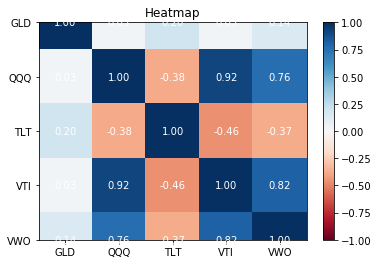

In [26]:
data.pct_change().plot_corr_heatmap()


In [37]:
weight1 = {'TLT':0,'VTI':1.0}
strategy1 = bt.Strategy('Stock only', [
    bt.algos.RunOnce(),
    bt.algos.SelectAll(),
    bt.algos.WeighSpecified(**weight1),
    bt.algos.Rebalance()])
test1 = bt.Backtest(strategy1, data)

weight2 = {'TLT':0.3,'VTI':0.7}
strategy2 = bt.Strategy('70/30 Portfolio, No Rebalance', [
    bt.algos.RunOnce(),
    bt.algos.SelectAll(),
    bt.algos.WeighSpecified(**weight2),
    bt.algos.Rebalance()])
test2 = bt.Backtest(strategy2, data)

weight3 = {'TLT':0.3,'VTI':0.7}
strategy3 = bt.Strategy('70/30 Portfolio, Quarterly Rebalance', [
    bt.algos.RunQuarterly(),
    bt.algos.SelectAll(),
    bt.algos.WeighSpecified(**weight3),
    bt.algos.Rebalance()])
test3 = bt.Backtest(strategy3, data)
res = bt.run(test1, test2, test3)

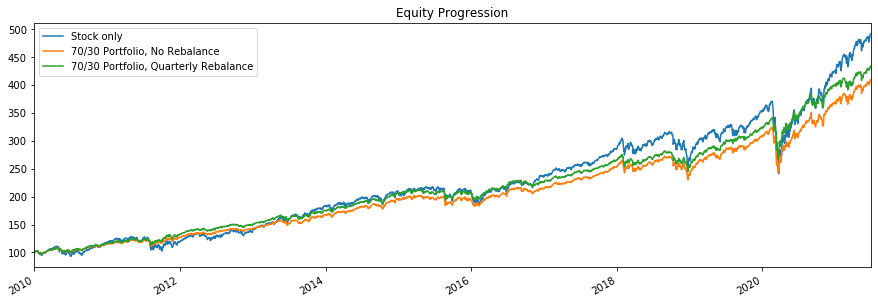

In [38]:
res.plot()

In [42]:
strategy4 = bt.Strategy(
    "Wieghts proportional to the inverse of volatility",
    [
#        bt.algos.RunQuarterly(),
        bt.algos.RunMonthly(),
        bt.algos.SelectAll(),
        bt.algos.WeighInvVol(),
        bt.algos.Rebalance(),
    ],
)
test4 = bt.Backtest(strategy4, data)

res = bt.run(test1, test2, test3, test4)

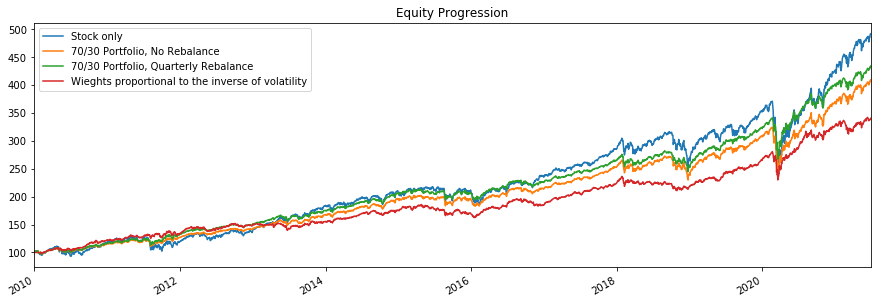

In [43]:
res.plot()